In [55]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
elixhauser = pd.read_csv("elixhauser_ahrq_no_drg_filter.csv")
elixhauser.head()

,subject_id,hadm_id,icustay_id,gender,age_years,admission_type,admission_type_grp,intime,outtime,icu_los_days,...,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
0,87977,100011,214619,M,21,EMERGENCY,non-elective,2177-08-29 04:52:21,2177-09-09 16:56:35,11.5029,...,0,0,0,0,0,0,0,1,0,0
1,9588,100041,271871,M,64,ELECTIVE,elective,2140-12-08 11:05:00,2140-12-09 15:30:00,1.1840,...,0,0,0,0,0,0,0,0,0,0
2,29633,100050,279769,M,70,ELECTIVE,elective,2179-09-20 12:39:22,2179-09-21 14:43:29,1.0862,...,1,0,0,0,0,0,0,0,0,0
3,14121,100058,297937,F,57,EMERGENCY,non-elective,2139-09-08 21:39:10,2139-09-23 14:56:30,14.7204,...,0,0,0,1,0,0,0,0,0,0
4,19717,100071,263159,F,57,EMERGENCY,non-elective,2160-03-27 00:11:24,2160-03-29 01:03:13,2.0360,...,0,0,0,1,0,0,0,0,0,0


In [4]:
elixhauser.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'gender', 'age_years',
       'admission_type', 'admission_type_grp', 'intime', 'outtime',
       'icu_los_days', 'hosp_los_days', 'hosp_mortality', 'n_distinct_icd9',
       'icd9_codes', 'icd9_code_titles', 'icd9_json',
       'congestive_heart_failure', 'cardiac_arrhythmias', 'valvular_disease',
       'pulmonary_circulation', 'peripheral_vascular', 'hypertension',
       'paralysis', 'other_neurological', 'chronic_pulmonary',
       'diabetes_uncomplicated', 'diabetes_complicated', 'hypothyroidism',
       'renal_failure', 'liver_disease', 'peptic_ulcer', 'aids', 'lymphoma',
       'metastatic_cancer', 'solid_tumor', 'rheumatoid_arthritis',
       'coagulopathy', 'obesity', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression'],
      dtype='object')

In [5]:
print("Number of male:", elixhauser[elixhauser['gender']=='M'].shape[0])
print("Percentage of male:", elixhauser[elixhauser['gender']=='M'].shape[0] / elixhauser.shape[0] * 100)


Number of male: 21152
Percentage of male: 57.77972027972028


In [6]:
print("Number of female:", elixhauser[elixhauser['gender']=='F'].shape[0])
print("Percentage of female:", elixhauser[elixhauser['gender']=='F'].shape[0] / elixhauser.shape[0] * 100)

Number of female: 15456
Percentage of female: 42.22027972027972


In [7]:
elixhauser[['n_distinct_icd9','icd9_codes']]

,n_distinct_icd9,icd9_codes
0,14,"{2851,30560,48242,8052,80703,82111,8220,82525,..."
1,8,"{2449,2749,4019,412,41401,4414,496,V1582}"
2,10,"{2875,41401,4241,42731,4280,53081,5990,99791,9..."
3,5,"{2761,3051,34680,430,78659}"
4,4,"{2762,34290,49392,53081}"
...,...,...
36603,1,{430}
36604,1,{4241}
36605,1,{430}
36606,1,{7455}


## Median Of Morbidity count (IQR)

Notice: From the Definitions of Comorbidities table, they combine Hypertension,uncomplicated (htn) and Hypertension,comlicated(htncx) to Hypertension (combined)

In [8]:
# elixhauser['ht'] = elixhauser['htn'] + elixhauser['htncx']

In [9]:
elixhauser_index = ['congestive_heart_failure', 'cardiac_arrhythmias', 'valvular_disease',
       'pulmonary_circulation', 'peripheral_vascular', 'hypertension',
       'paralysis', 'other_neurological', 'chronic_pulmonary',
       'diabetes_uncomplicated', 'diabetes_complicated', 'hypothyroidism',
       'renal_failure', 'liver_disease', 'peptic_ulcer', 'aids', 'lymphoma',
       'metastatic_cancer', 'solid_tumor', 'rheumatoid_arthritis',
       'coagulopathy', 'obesity', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression']

In [10]:
len(elixhauser_index)

30

In [11]:
elixhauser_count = elixhauser[elixhauser_index].sum(axis=1)
median_count = np.median(elixhauser_count)
print("Median of Morbidity count:", median_count)

Median of Morbidity count: 3.0


## Percent with Multimorbidity

In [12]:
print("Percentage of patients with multipmorbidity:", sum(elixhauser[elixhauser_index].sum(axis=1) >= 2)/elixhauser.shape[0] * 100)

Percentage of patients with multipmorbidity: 76.86298076923077


In [13]:
female_elixhauser = elixhauser[elixhauser['gender']=='F']

In [14]:
print("Percentage of female patients with multimorbidity:", sum(female_elixhauser[elixhauser_index].sum(axis=1) >= 2)/female_elixhauser.shape[0] * 100)

Percentage of female patients with multimorbidity: 79.24430641821945


In [15]:
male_exlixhauser = elixhauser[elixhauser['gender']=='M']
print("Percentage of male patients with multimorbidity:", sum(male_exlixhauser[elixhauser_index].sum(axis=1) >= 2)/male_exlixhauser.shape[0] * 100)

Percentage of male patients with multimorbidity: 75.12291981845688


### AGE GROUP

In [16]:
first_age_group = elixhauser[elixhauser['age_years'] <= 24]
print(sum(first_age_group[elixhauser_index].sum(axis=1) >= 2)/first_age_group.shape[0] * 100)

30.993150684931507


In [17]:
second_age_group = elixhauser[(elixhauser['age_years'] > 24) & (elixhauser['age_years'] <= 44)]
print(sum(second_age_group[elixhauser_index].sum(axis=1) >= 2)/second_age_group.shape[0] * 100)

56.40230394328755


In [18]:
third_age_group = elixhauser[(elixhauser['age_years'] > 44) & (elixhauser['age_years'] <= 64)]
print(sum(third_age_group[elixhauser_index].sum(axis=1) >= 2)/third_age_group.shape[0] * 100)

74.10770194113964


In [19]:
fourth_age_group = elixhauser[(elixhauser['age_years'] > 64) & (elixhauser['age_years'] <= 84)]
print(sum(fourth_age_group[elixhauser_index].sum(axis=1) >= 2)/fourth_age_group.shape[0] * 100)

86.26541248252192


In [20]:
fifth_age_group = elixhauser[elixhauser['age_years'] > 84]
print(sum(fifth_age_group[elixhauser_index].sum(axis=1) >= 2)/fifth_age_group.shape[0] * 100)

90.6043046357616


In [80]:

# 16-24, 25-44, 45-64, 65-84, >85
age_order = ['0-24', '25-44', '45-64', '65-84', '>85']

# for fig-1a
def age_brackets(age):
    if age >= 16 and age <= 24:
        return '0-24'
    elif age >= 25 and age <=44:
        return '25-44'
    elif age >= 45 and age <= 64:
        return '45-64'
    elif age >= 65 and age <= 84:
        return '65-84'
    else:
        return '>85'
    
    
cohort = elixhauser.copy()
cohort['age_brackets'] = cohort['age_years'].apply(age_brackets)
cohort['age_brackets'] = pd.Categorical(
    cohort['age_brackets'],
    categories=age_order,
    ordered=True
)


In [81]:
cohort['comorbidities'] = cohort[elixhauser_index].sum(axis=1)
cohort['multimorbidity'] = (cohort['comorbidities'] >= 2).astype(int)


In [82]:
fig_1a = (
    cohort.groupby('age_brackets')['multimorbidity']
      .agg(['mean', 'count'])
      .reset_index()
      .rename(columns={'mean': 'pct_multimorbidity', 'count': 'n'})
)
fig_1a['pct_multimorbidity'] *= 100
fig_1a['se'] = np.sqrt(
    fig_1a['pct_multimorbidity']*(100-fig_1a['pct_multimorbidity'])/fig_1a['n']
)


fig_1a


/var/folders/qp/dsjzkwhd6gz1p6cvsjsh0ktm0000gn/T/ipykernel_23504/3296133022.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort.groupby('age_brackets')['multimorbidity']


,age_brackets,pct_multimorbidity,n,se
0,0-24,30.993151,1168,1.353186
1,25-44,56.402304,4514,0.738073
2,45-64,74.107702,12776,0.387543
3,65-84,86.265412,15734,0.274414
4,>85,90.604305,2416,0.593595


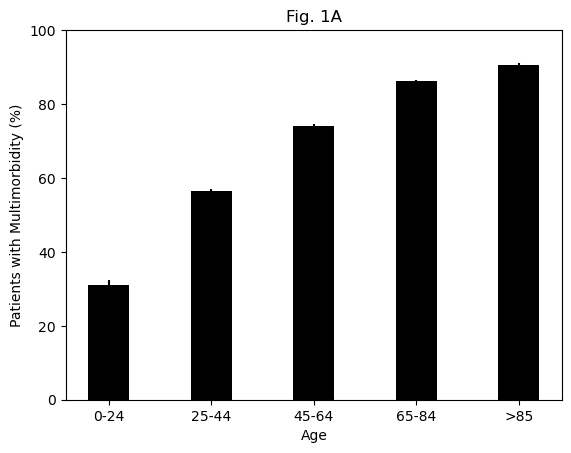

In [83]:
plt.bar(
    fig_1a['age_brackets'],
    fig_1a['pct_multimorbidity'],
    yerr=fig_1a['se'],
    color='black',
    width=0.4
)
plt.xlabel('Age')
plt.ylabel('Patients with Multimorbidity (%)')
plt.ylim(0,100)
plt.title('Fig. 1A')
plt.show()

